# FUEL CONSUMPTION PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv("final_data.csv")
data

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,Manual,Petrol,NaN,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,Automatic,Petrol,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,Automatic,Petrol,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,Automatic,Petrol,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,Automatic,Petrol,11.2,8.0,9.8,29.0,230.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,Semi-Automatic,Petrol,10.7,7.7,9.4,30.0,219.0,5.0,5.0
941,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,Semi-Automatic,Petrol,10.5,8.1,9.4,30.0,219.0,5.0,5.0
942,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,Semi-Automatic,Petrol,11.0,8.7,9.9,29.0,232.0,5.0,NaN
943,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,Semi-Automatic,Petrol,11.5,8.4,10.1,28.0,236.0,5.0,5.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         945 non-null    int64  
 1   Make                               945 non-null    object 
 2   Model                              945 non-null    object 
 3   Vehicle Class                      945 non-null    object 
 4   Engine Size(L)                     945 non-null    float64
 5   Cylinders                          945 non-null    int64  
 6   Transmission                       945 non-null    object 
 7   Fuel Type                          945 non-null    object 
 8   Fuel Consumption (City (L/100 km)  931 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   930 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  945 non-null    float64
 11  Fuel Consumption(Comb (mpg))       931 non-null    float64

In [4]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [5]:
data[['CO2 Rating','Smog Rating','CO2 Emissions(g/km)']].corr()

,CO2 Rating,Smog Rating,CO2 Emissions(g/km)
CO2 Rating,1.000000,0.503795,-0.955018
Smog Rating,0.503795,1.000000,-0.520441
CO2 Emissions(g/km),-0.955018,-0.520441,1.000000


In [6]:
df= data.drop(['Model Year','Make','Model','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)','Smog Rating'],axis=1)

In [7]:
df

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Rating
0,Compact,2.4,4,Manual,Petrol,8.6,6.0
1,SUV: Small,3.5,6,Automatic,Petrol,11.2,4.0
2,SUV: Small,2.0,4,Automatic,Petrol,9.9,5.0
3,SUV: Small,2.0,4,Automatic,Petrol,10.3,5.0
4,Compact,2.0,4,Automatic,Petrol,9.8,5.0
...,...,...,...,...,...,...,...
940,SUV: Small,2.0,4,Semi-Automatic,Petrol,9.4,5.0
941,SUV: Small,2.0,4,Semi-Automatic,Petrol,9.4,5.0
942,SUV: Small,2.0,4,Semi-Automatic,Petrol,9.9,5.0
943,SUV: Standard,2.0,4,Semi-Automatic,Petrol,10.1,5.0


In [8]:
df = df.rename(columns = {'Vehicle Class':'Vehicle Class', 'Engine Size(L)':'Engine Size', 'Cylinders': 'Cylinders', 'Transmission':'Transmission','Fuel Type':'Fuel Type', 'Fuel Consumption(Comb (L/100 km))':'Fuel Consumption', 'CO2 Rating':'CO2 Rating'})

In [9]:
df.isna().sum()

Vehicle Class        0
Engine Size          0
Cylinders            0
Transmission         0
Fuel Type            0
Fuel Consumption     0
CO2 Rating          13
dtype: int64

In [10]:
df['Fuel Type'].fillna((df['Fuel Type'].mode()[0]), inplace=True)

In [11]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,Manual,Petrol,8.6,6.0
1,SUV: Small,3.5,6,Automatic,Petrol,11.2,4.0
2,SUV: Small,2.0,4,Automatic,Petrol,9.9,5.0
3,SUV: Small,2.0,4,Automatic,Petrol,10.3,5.0
4,Compact,2.0,4,Automatic,Petrol,9.8,5.0


In [12]:
df[['Fuel Consumption','CO2 Rating']].corr()

,Fuel Consumption,CO2 Rating
Fuel Consumption,1.00000,-0.92762
CO2 Rating,-0.92762,1.00000


In [13]:
df[['Fuel Consumption','CO2 Rating']].groupby('CO2 Rating').median()

,Fuel Consumption
CO2 Rating,
1.0,21.5
2.0,16.0
3.0,13.9
4.0,11.7
5.0,9.9
6.0,8.3
7.0,7.3
8.0,6.0
9.0,4.8


In [14]:
df['CO2 Rating'].fillna(0,inplace=True)
new_ratting = []

for fuel,co2 in zip(df['Fuel Consumption'], df['CO2 Rating']):
    if co2==0:
        if 20 <= fuel:
            new_ratting.append(1)
        elif 16.0 <= fuel < 20.0:
            new_ratting.append(2) 
        elif 14.0 <= fuel < 16.0: 
            new_ratting.append(3)
        elif 12.0 <= fuel < 14.0: 
            new_ratting.append(4)
        elif 10.0 <= fuel < 12.0: 
            new_ratting.append(5)
        elif 8.0 <= fuel < 10.0: 
            new_ratting.append(6)
        elif 7.0 <= fuel < 8.0: 
            new_ratting.append(7)
        elif 6.0 <= fuel < 7.0: 
            new_ratting.append(8)
        elif 5.0 <= fuel < 6.0: 
            new_ratting.append(9)
        elif fuel < 5.0: 
            new_ratting.append(10)            
    else:
        new_ratting.append(co2)
        
        
df['CO2 Rating'] = new_ratting

In [15]:
df.isna().sum()

Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel Type           0
Fuel Consumption    0
CO2 Rating          0
dtype: int64

In [16]:
df.corr()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
Engine Size,1.000000,0.920672,0.818655,-0.766032
Cylinders,0.920672,1.000000,0.821719,-0.761408
Fuel Consumption,0.818655,0.821719,1.000000,-0.927449
CO2 Rating,-0.766032,-0.761408,-0.927449,1.000000


In [17]:
df.corr()["Fuel Consumption"].to_frame()

,Fuel Consumption
Engine Size,0.818655
Cylinders,0.821719
Fuel Consumption,1.000000
CO2 Rating,-0.927449


In [18]:
df['Transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Automatic'], dtype=object)

In [19]:
df[['Engine Size','Cylinders','Fuel Consumption','CO2 Rating']].describe()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
count,945.000000,945.000000,945.000000,945.000000
mean,3.199683,5.669841,11.093439,4.542857
std,1.375231,1.932930,2.877491,1.471665
min,1.200000,3.000000,4.000000,1.000000
25%,2.000000,4.000000,9.100000,3.000000
50%,3.000000,6.000000,10.800000,5.000000
75%,3.800000,6.000000,12.900000,5.000000
max,8.000000,16.000000,26.100000,10.000000


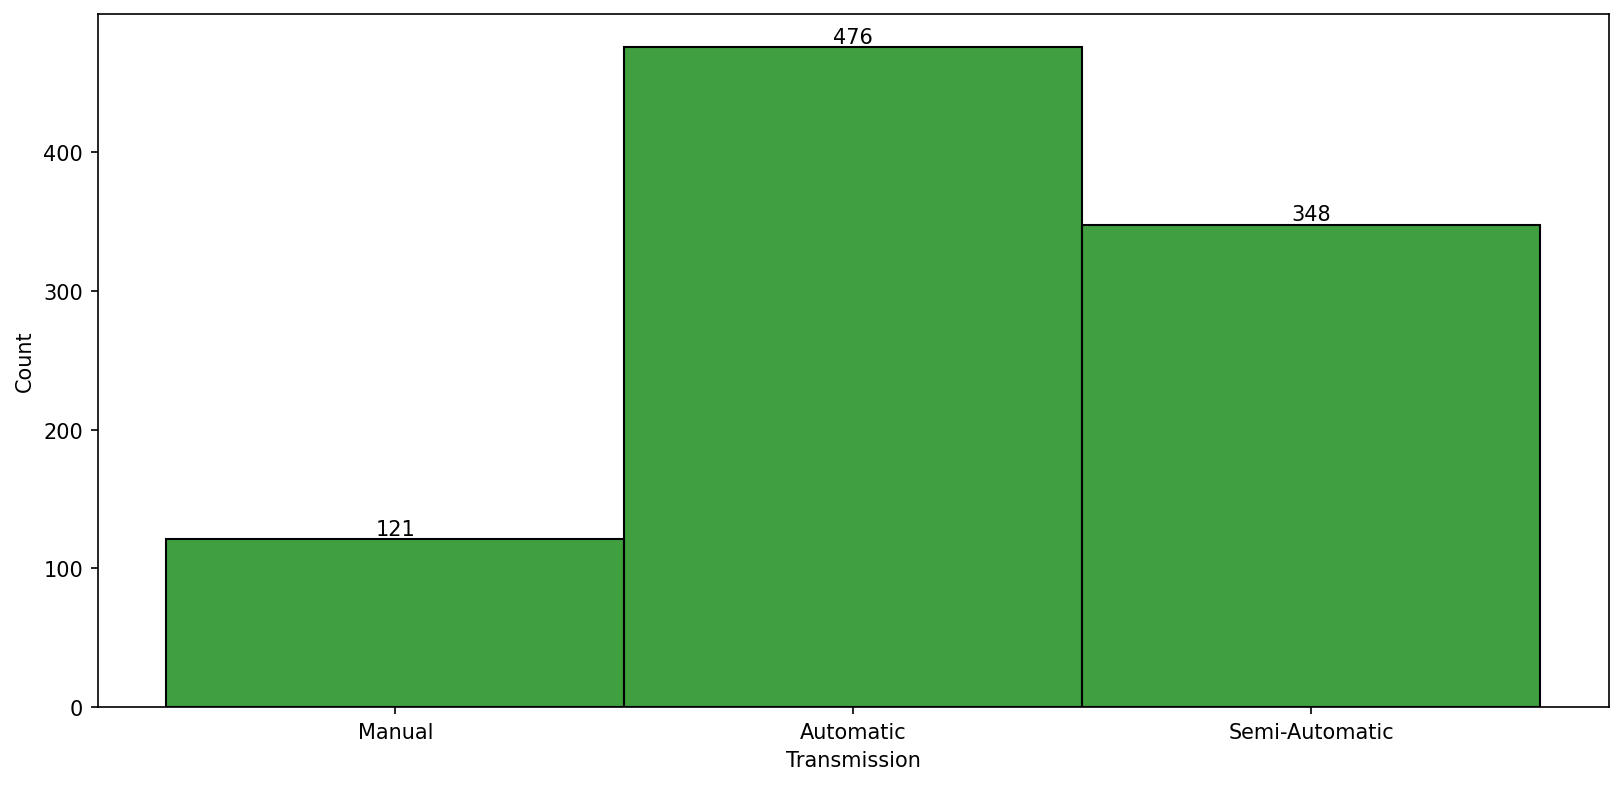

In [20]:
plt.figure(figsize=(13,6), dpi=150)
chart1=sns.histplot(data=df, x='Transmission', color='Green')
chart1.bar_label(chart1.containers[0],size=10)
plt.show()

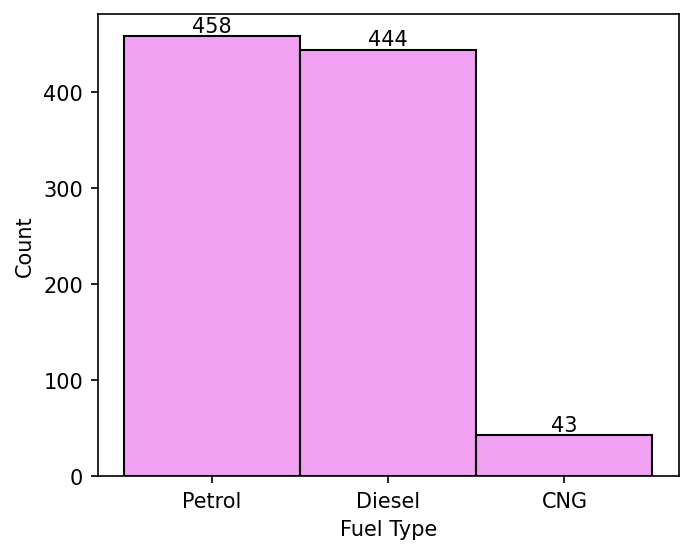

In [21]:
plt.figure(figsize=(5,4), dpi=150)
chart1=sns.histplot(data=df, x='Fuel Type', color='Violet')
chart1.bar_label(chart1.containers[0],size=10)
plt.show()

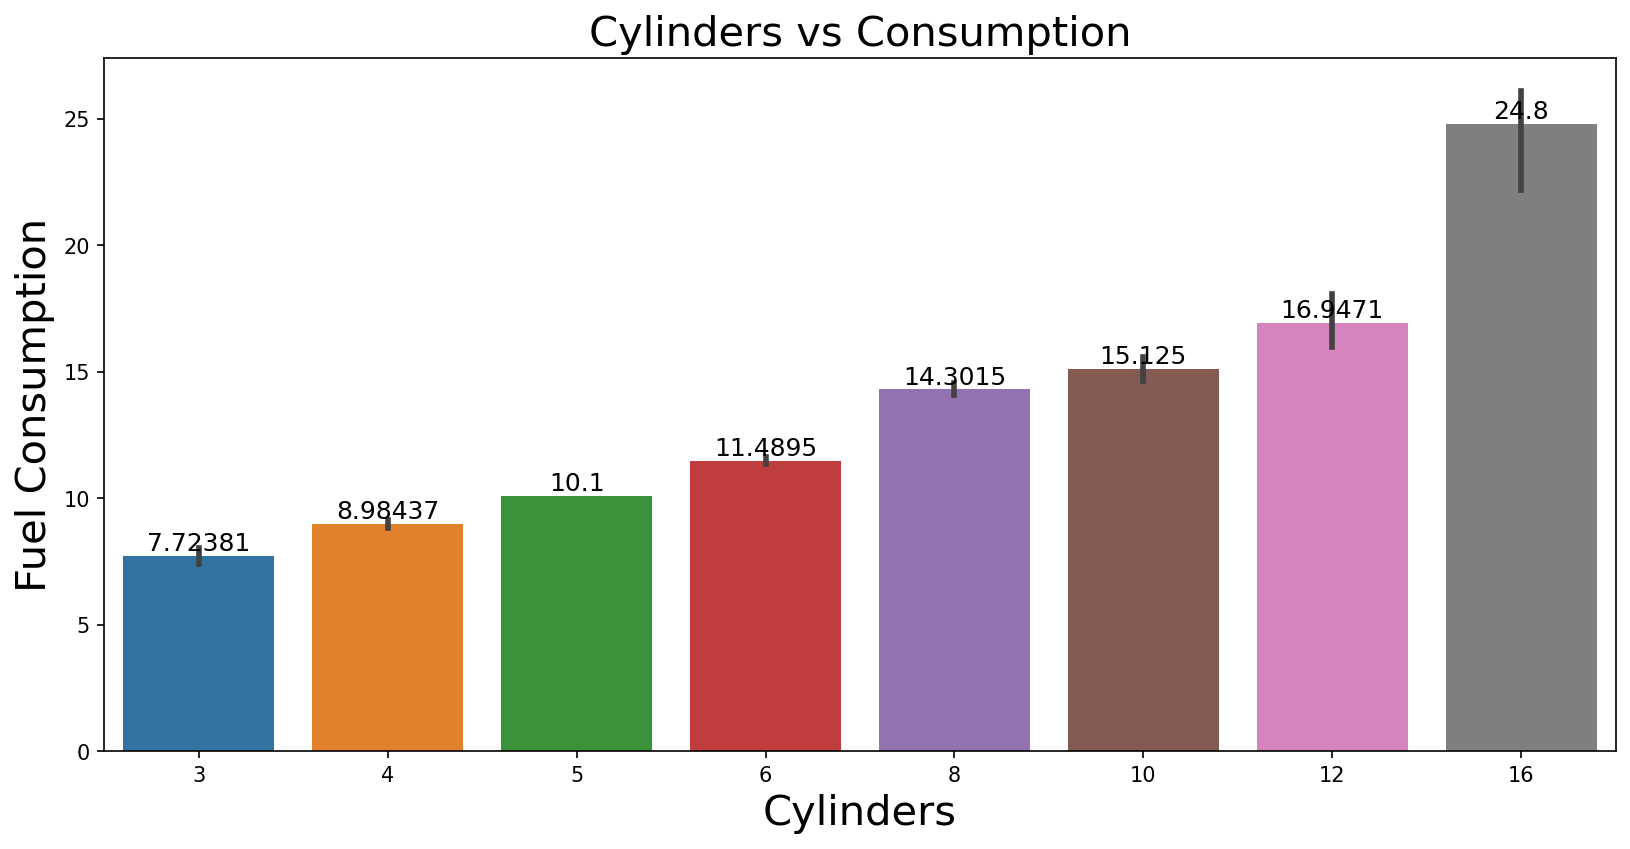

In [24]:
plt.figure(figsize=(13,6), dpi=150)
plt.xticks()
plt.title('Cylinders vs Consumption',size=20)
chart1=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption")
plt.xlabel('Cylinders',size=20)
plt.ylabel('Fuel Consumption',size=20)
chart1.bar_label(chart1.containers[0],size=12)
plt.show()

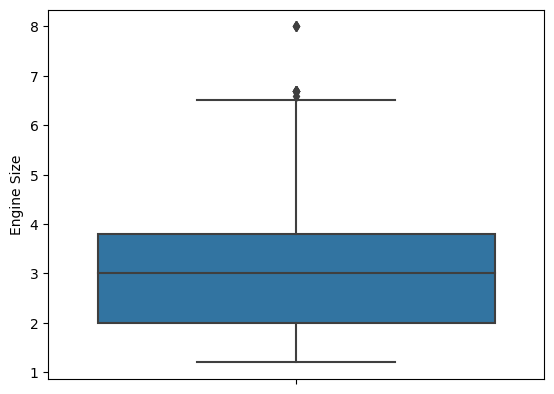

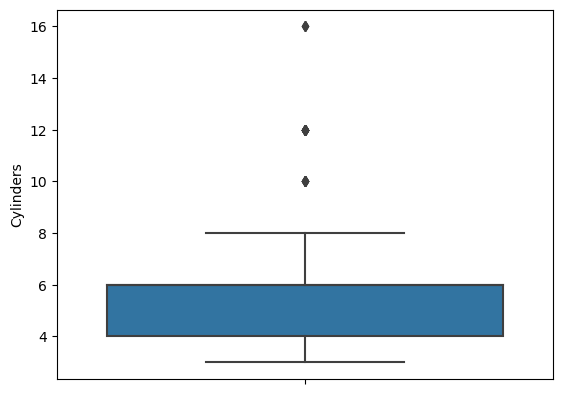

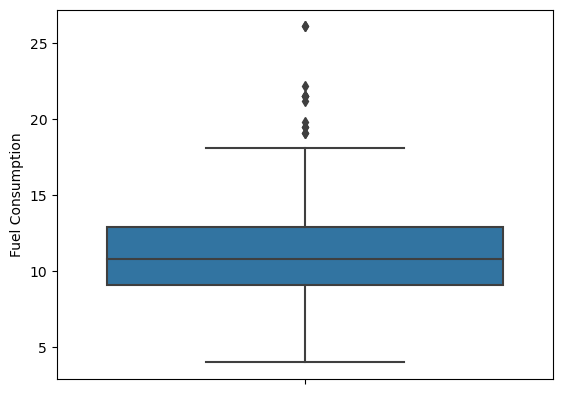

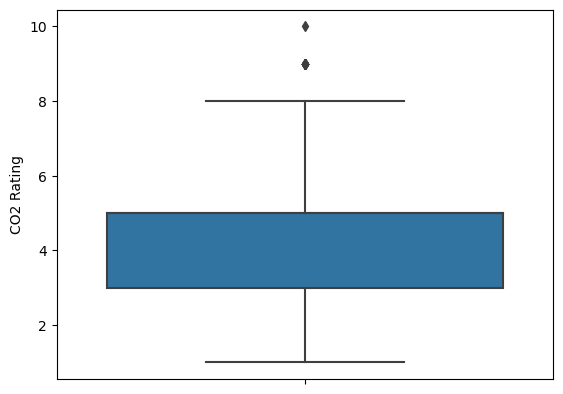

In [25]:
for col in df.columns:
    if df[col].dtypes!= object:
        sns.boxplot(y=col,data=df)
        plt.show()

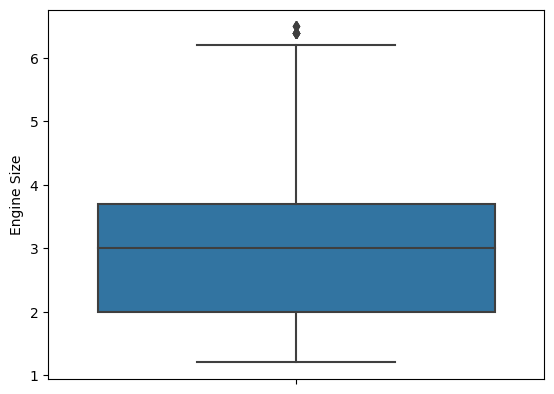

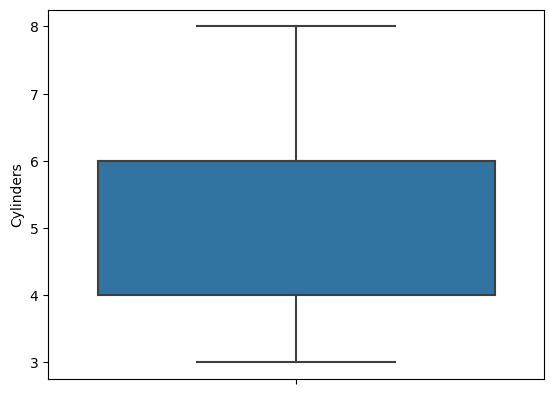

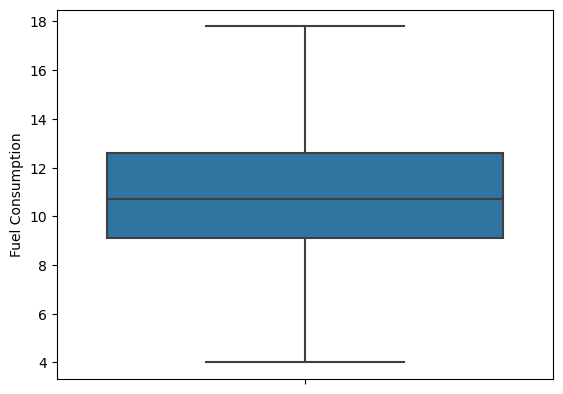

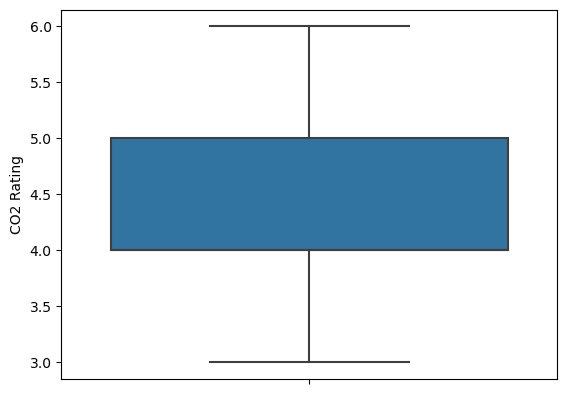

In [26]:
for col in df.columns:
    if df[col].dtypes!= object:
        percentile_25=df[col].quantile(0.25)
        percentile_75=df[col].quantile(0.75)
        IQR=percentile_75-percentile_25
        upper_limit=percentile_75+(1.5*IQR)
        lower_limit=percentile_25-(1.5*IQR)
        df=df[df[col]<=upper_limit]
        df=df[df[col]>=lower_limit]
        plt.figure()
        sns.boxplot(y=col,data=df)

In [27]:
df.shape

(782, 7)

In [28]:
order = ['Automatic', 'Semi-Automatic', 'Manual']

od = OrdinalEncoder(categories = [order])

df["Transmission_X"] = od.fit_transform(df[["Transmission"]])

In [29]:
order = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan',\
         'Station wagon: Small','Station wagon: Mid-size', 'Pickup truck: Small', 'Special purpose vehicle',\
         'Pickup truck: Standard']

od = OrdinalEncoder(categories = [order])

df["Vehicle Class_X"] = od.fit_transform(df[["Vehicle Class"]])

In [30]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X
0,Compact,2.4,4,Manual,Petrol,8.6,6.0,2.0,2.0
1,SUV: Small,3.5,6,Automatic,Petrol,11.2,4.0,0.0,6.0
2,SUV: Small,2.0,4,Automatic,Petrol,9.9,5.0,0.0,6.0
3,SUV: Small,2.0,4,Automatic,Petrol,10.3,5.0,0.0,6.0
4,Compact,2.0,4,Automatic,Petrol,9.8,5.0,0.0,2.0


In [31]:
new_df = df['Fuel Type'].str.get_dummies()

In [32]:
new_df

,CNG,Diesel,Petrol
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
940,0,0,1
941,0,0,1
942,0,0,1
943,0,0,1


In [33]:
df= pd.concat([df,new_df], axis =1)

In [34]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X,CNG,Diesel,Petrol
0,Compact,2.4,4,Manual,Petrol,8.6,6.0,2.0,2.0,0,0,1
1,SUV: Small,3.5,6,Automatic,Petrol,11.2,4.0,0.0,6.0,0,0,1
2,SUV: Small,2.0,4,Automatic,Petrol,9.9,5.0,0.0,6.0,0,0,1
3,SUV: Small,2.0,4,Automatic,Petrol,10.3,5.0,0.0,6.0,0,0,1
4,Compact,2.0,4,Automatic,Petrol,9.8,5.0,0.0,2.0,0,0,1


In [35]:
x = df.drop(["Fuel Type",'Fuel Consumption',"Vehicle Class","Transmission"], axis = 1)

In [36]:
x.head()

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,CNG,Diesel,Petrol
0,2.4,4,6.0,2.0,2.0,0,0,1
1,3.5,6,4.0,0.0,6.0,0,0,1
2,2.0,4,5.0,0.0,6.0,0,0,1
3,2.0,4,5.0,0.0,6.0,0,0,1
4,2.0,4,5.0,0.0,2.0,0,0,1


In [37]:
y= df['Fuel Consumption']

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.20 , random_state= 51)

In [39]:
xtrain

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,CNG,Diesel,Petrol
131,3.0,6,5.0,1.0,0.0,0,0,1
421,5.3,8,3.0,0.0,7.0,0,1,0
618,3.0,6,4.0,0.0,4.0,0,0,1
781,3.0,6,4.0,2.0,1.0,0,0,1
287,2.3,4,3.0,1.0,6.0,0,1,0
...,...,...,...,...,...,...,...,...
631,2.0,4,6.0,0.0,2.0,0,1,0
834,5.7,8,3.0,0.0,13.0,0,1,0
872,2.5,4,6.0,1.0,4.0,0,1,0
584,3.5,6,5.0,0.0,4.0,0,1,0


In [40]:
sc = StandardScaler()

In [41]:
xtrain = sc.fit_transform(xtrain)

In [42]:
xtrain

array([[-0.15114674,  0.2700564 ,  0.61216485, ..., -0.21248647,
        -0.88066349,  0.96076892],
       [ 1.72838126,  1.57341742, -1.38576221, ..., -0.21248647,
         1.1355075 , -1.040833  ],
       [-0.15114674,  0.2700564 , -0.38679868, ..., -0.21248647,
        -0.88066349,  0.96076892],
       ...,
       [-0.55973978, -1.03330461,  1.61112839, ..., -0.21248647,
         1.1355075 , -1.040833  ],
       [ 0.2574463 ,  0.2700564 ,  0.61216485, ..., -0.21248647,
         1.1355075 , -1.040833  ],
       [ 0.66603935,  1.57341742, -0.38679868, ..., -0.21248647,
        -0.88066349,  0.96076892]])

In [43]:
xtest = sc.transform(xtest)

In [44]:
xtest

array([[ 0.2574463 ,  0.2700564 , -0.38679868, ..., -0.21248647,
         1.1355075 , -1.040833  ],
       [ 0.33916491,  0.2700564 ,  0.61216485, ..., -0.21248647,
         1.1355075 , -1.040833  ],
       [ 0.66603935,  1.57341742, -1.38576221, ..., -0.21248647,
        -0.88066349,  0.96076892],
       ...,
       [ 0.33916491,  0.2700564 ,  0.61216485, ..., -0.21248647,
         1.1355075 , -1.040833  ],
       [ 0.2574463 ,  0.2700564 ,  0.61216485, ..., -0.21248647,
        -0.88066349,  0.96076892],
       [-0.96833283, -1.03330461,  0.61216485, ..., -0.21248647,
         1.1355075 , -1.040833  ]])

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [47]:
lr.intercept_

11.1352

In [50]:
print("training score = ",lr.score(xtrain,ytrain))
print("testing score = ",lr.score(xtest,ytest))

training score =  0.8951192512729067
testing score =  0.7846254929444323


In [48]:
ypred = lr.predict(xtest)

In [49]:
r2_score(ytest, ypred)

0.7846254929444323

In [51]:
import os
import pickle as pk

In [52]:
filename = "scaled_data.sav"
pk.dump(sc, open(filename, "wb")) 
loaded_scaler = pk.load(open("scaled_data.sav", "rb")) 

In [53]:
filename = "trained_model_lr.sav"
pk.dump(lr, open(filename, "wb"))
loaded_model = pk.load(open("trained_model_lr.sav", "rb"))

In [54]:
trail_inputs = ["Compact",2.4,4,"AV",6.0,"X"]

In [ ]:
def input_converter(trail_inputs):
    vcl = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan','Station wagon: Small','Station wagon: Mid-size','Pickup truck: Small','Special purpose vehicle','Pickup truck: Standard']
    trans = ['Automatic','Semi-Automatic','Manual']
    fuel = ["Petrol","Diesel","CNG"]
    lst = []
    for i in range(9):
        if(type(trail_inputs[i]) == str):
            if(trail_inputs[i] in vcl):
                lst.append(vcl.index(trail_inputs[i]))
            elif(trail_inputs[i] in trans):
                lst.append(trans.index(trail_inputs[i]))
            elif(trail_inputs[i] in fuel):
                if(fuel.index(trail_inputs[i]) == 0):
                    lst.extend([1,0,0,0])
                    break
                elif(fuel.index(trail_inputs[i]) == 1):
                    lst.extend([0,1,0,0])
                    break
                elif(fuel.index(trail_inputs[i]) == 2):
                    lst.extend([0,0,1,0])
                    break
                elif(fuel.index(trail_inputs[i]) == 3):
                    lst.extend([0,0,0,1])
        else:
            lst.append(trail_inputs[i])

    arr = np.asarray(lst)
    arr = arr.reshape(1, -1)
    arr = loaded_scaler.transform(arr)
    prediction = loaded_model.predict(arr)
    
    return(f"The Fuel Consumption L/100km is {round(prediction[0],2)}")



input_converter(trail_inputs)